In [164]:
import os
import pandas as pd
os.chdir(r'/Users/anceaumathilde/Downloads')
df=pd.read_csv('city_temp_cleaned.csv')

In [165]:
df.head()


,Region,Country,State,City,Month,Day,Year,AvgCelsiusTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.83


In [166]:
o=df.loc[df.Year<2020]

In [167]:
f=o[['Year','AvgCelsiusTemp','Country']].groupby(['Year','Country']).mean()
f=pd.DataFrame(f.to_records())
f

,Year,Country,AvgCelsiusTemp
0,1995,Algeria,18.005702
1,1995,Argentina,16.500712
2,1995,Australia,16.389907
3,1995,Austria,10.139342
4,1995,Bahamas,25.061731
...,...,...,...
2951,2019,Uruguay,16.772340
2952,2019,Uzbekistan,16.667604
2953,2019,Venezuela,26.564899
2954,2019,Vietnam,25.127716


In [168]:
f=f[['Year','AvgCelsiusTemp']].groupby(['Year']).AvgCelsiusTemp.mean()
f

Year
1995    18.647884
1996    18.515495
1997    18.701215
1998    19.076526
1999    18.780694
2000    18.732243
2001    18.776380
2002    19.036887
2003    18.986535
2004    18.858963
2005    18.908007
2006    18.943281
2007    19.045864
2008    18.905828
2009    18.974452
2010    19.224552
2011    18.936769
2012    18.568879
2013    18.736519
2014    18.979624
2015    19.196587
2016    19.116120
2017    19.003478
2018    19.020900
2019    19.067794
Name: AvgCelsiusTemp, dtype: float64

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes import jtplot

<AxesSubplot:xlabel='Year', ylabel='AvgCelsiusTemp'>

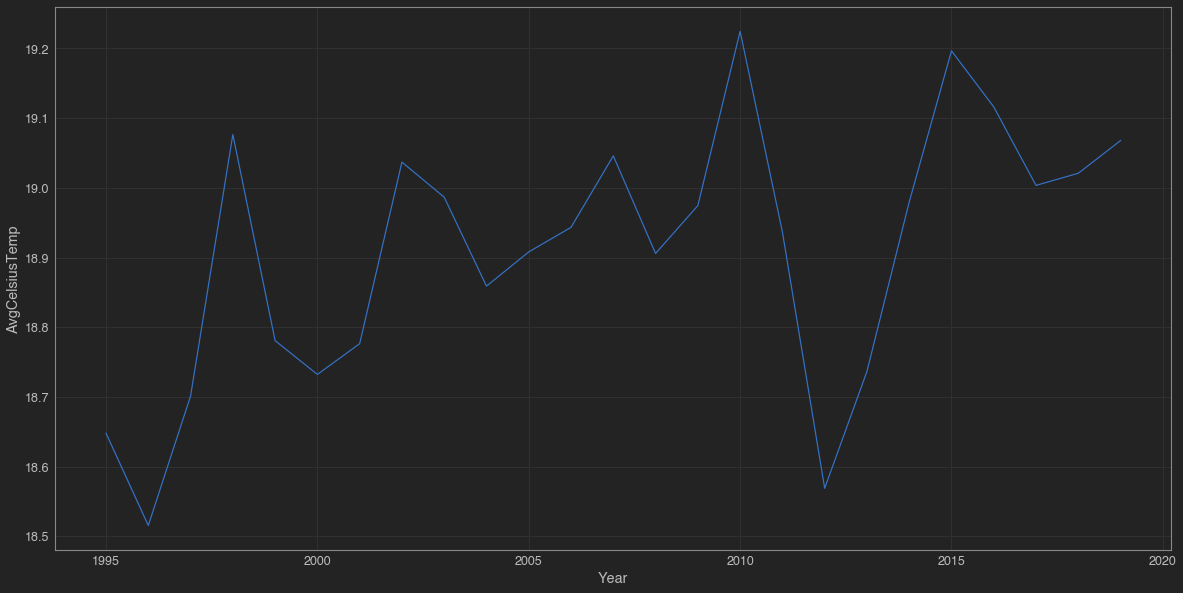

In [179]:
y=f.index
x=f.values
jtplot.style(theme='monokai')
fig=plt.figure(figsize=(20,10))
sns.lineplot(data=f)


In [373]:
test=o.copy()
test['AvgCelsiusTemp']=round(test.AvgCelsiusTemp)


,Region,Country,State,City,Month,Day,Year,AvgCelsiusTemp
0,Africa,Algeria,NaN,Algiers,1,1,1995,18.0
1,Africa,Algeria,NaN,Algiers,1,2,1995,10.0
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.0
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.0
4,Africa,Algeria,NaN,Algiers,1,5,1995,9.0
...,...,...,...,...,...,...,...,...
2826650,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.0
2826651,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,28.0
2826652,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.0
2826653,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,29.0


(<Figure size 864x576 with 26 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>])

<Figure size 460.8x403.2 with 0 Axes>

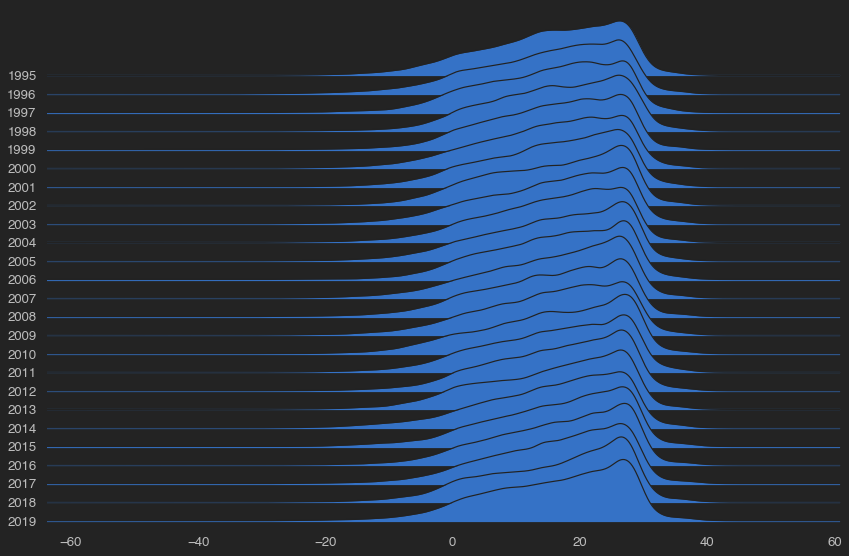

In [378]:
from joypy import joyplot

plt.figure()

joyplot(
    data=test[['AvgCelsiusTemp', 'Year']], 
    by='Year',
    figsize=(12, 8))

In [233]:
from bs4 import BeautifulSoup
import requests as r
import re

In [182]:
res= r.get('https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2020/data.xml')

In [258]:
soup=BeautifulSoup(res.content)
data = soup.findAll("year")
data2=soup.findAll("value")
lst=[]
lst2=[]

for tag in data:
    y=str(tag)
    x= re.findall("[0-9]+",y)
    lst.append(x)
    
for tog in data2:
    y=str(tog)
    x= re.findall(".[0-9]+...",y)
    lst2.append(x)

In [390]:
year=[int(item) for sublist in lst for item in sublist]
var=[item for sublist in lst2 for item in sublist]
var=[float(i.replace('>','+')) for i in var]


In [391]:
d = {'Year':year,'VarTemp':var}

var_w=pd.DataFrame(d)


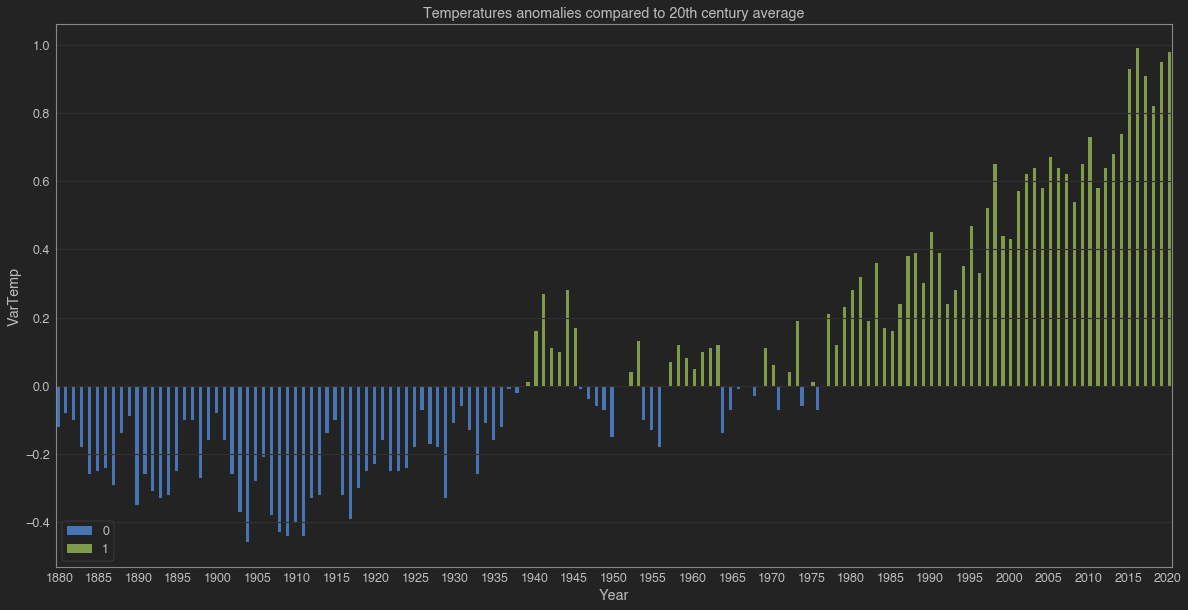

In [401]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

jtplot.style(theme='monokai')
fig=plt.figure(figsize=(20,10))
colors = [1 if c >= 0 else 0 for c in var_w.VarTemp]
ax=sns.barplot(data=var_w, x= var_w.Year, y=var_w.VarTemp,hue=colors,palette=sns.color_palette())
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.title('Temperatures anomalies compared to 20th century average')
plt.show()